In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [9]:
ds=pd.read_csv("BostonHousing.csv")
ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
print(ds.age)

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

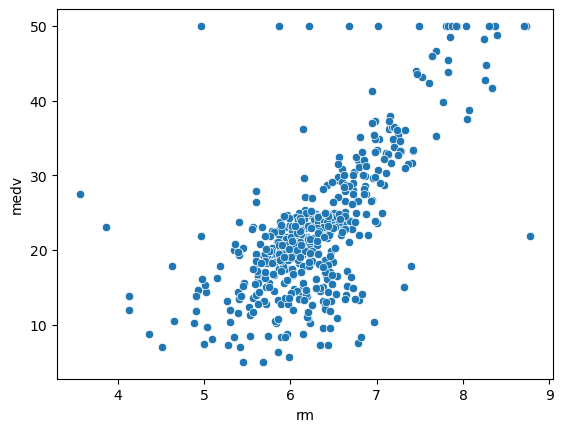

In [11]:
sns.scatterplot(x='rm',y='medv',data=ds)
plt.show

In [12]:
z_scores=(ds-ds.mean())/ds.std()
ds=ds[(np.abs(z_scores)<3).all(axis=1)]

In [13]:
X=ds[['rm', 'ptratio', 'lstat', 'crim', 'nox', 'tax', 'age', 'dis', 'rad', 'zn', 'indus', 'chas', 'b']]
Y=ds['medv']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [15]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
RF.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [16]:
from sklearn.metrics import r2_score
pred=RF.predict(X_test)
print(r2_score(Y_test,pred))

0.8101761812008521


In [17]:
import numpy as np

# Number of synthetic data points to generate
n_samples = 120  # You can adjust this number

# Generate synthetic features based on the distribution of existing features
synthetic_data = {
    'rm': np.random.normal(loc=ds['rm'].mean(), scale=ds['rm'].std(), size=n_samples),
    'ptratio': np.random.normal(loc=ds['ptratio'].mean(), scale=ds['ptratio'].std(), size=n_samples),
    'lstat': np.random.normal(loc=ds['lstat'].mean(), scale=ds['lstat'].std(), size=n_samples),
    'crim': np.random.normal(loc=ds['crim'].mean(), scale=ds['crim'].std(), size=n_samples),
    'nox': np.random.normal(loc=ds['nox'].mean(), scale=ds['nox'].std(), size=n_samples),
    'tax': np.random.normal(loc=ds['tax'].mean(), scale=ds['tax'].std(), size=n_samples),
    'age': np.random.normal(loc=ds['age'].mean(), scale=ds['age'].std(), size=n_samples),
    'dis': np.random.normal(loc=ds['dis'].mean(), scale=ds['dis'].std(), size=n_samples),
    'rad': np.random.normal(loc=ds['rad'].mean(), scale=ds['rad'].std(), size=n_samples),
    'zn': np.random.normal(loc=ds['zn'].mean(), scale=ds['zn'].std(), size=n_samples),
    'indus': np.random.normal(loc=ds['indus'].mean(), scale=ds['indus'].std(), size=n_samples),
    'chas': np.random.choice(ds['chas'].unique(), size=n_samples, p=ds['chas'].value_counts(normalize=True)),
    'b': np.random.normal(loc=ds['b'].mean(), scale=ds['b'].std(), size=n_samples),
}

# Create a DataFrame for the synthetic data
synthetic_ds = pd.DataFrame(synthetic_data)

# Generate synthetic target variable (medv) using the existing model
synthetic_ds['medv'] = RF.predict(synthetic_ds)

# Combine the synthetic data with the original dataset
ds_augmented = pd.concat([ds, synthetic_ds], ignore_index=True)


In [18]:
X_augmented=ds_augmented[['rm', 'ptratio', 'lstat', 'crim', 'nox', 'tax', 'age', 'dis', 'rad', 'zn', 'indus', 'chas', 'b']]
Y_augmented=ds_augmented['medv']
X_train_aug,X_test_aug,Y_train_aug,Y_test_aug=train_test_split(X_augmented,Y_augmented,test_size=0.3,random_state=0)
RF_augmented=RandomForestRegressor(n_estimators=100,random_state=0)
RF.fit(X_train_aug,Y_train_aug)
Y_pred=RF.predict(X_test_aug)
print(r2_score(Y_pred,Y_test_aug))


0.7029255643410356
